In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [8]:
genes = ['gene' + str(i) for i in range(1,101)]
# wild type samples
wt = ['wt' + str(i) for i in range(1,6)]
# knock out samples
ko = ['ko' + str(i) for i in range(1,6)]

In [35]:
data = pd.DataFrame(columns=[*wt,*ko], index=genes)

In [37]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam = rd.randrange(10, 1000), size = 5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam = rd.randrange(10, 1000), size = 5)

In [38]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,894,960,901,875,918,600,595,648,583,557
gene2,973,999,954,988,984,857,997,917,941,892
gene3,314,300,310,300,301,817,838,777,811,767
gene4,841,754,802,790,763,980,925,970,974,925
gene5,664,660,642,704,653,912,928,962,918,945


In [40]:
scaled_data = preprocessing.scale(data.T)

In [41]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [45]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

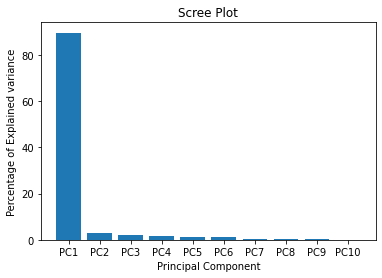

In [46]:
plt.bar(x = range(1, len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('Percentage of Explained variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [48]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

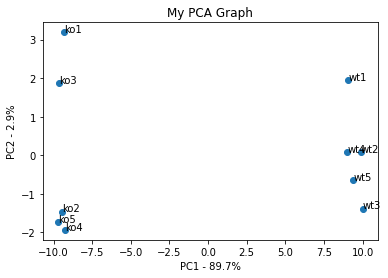

In [60]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
[plt.annotate(sample, (pca_df.PC1[sample], pca_df.PC2[sample])) for sample in pca_df.index]
plt.show()

In [66]:
# loading scores - which variable has the most influence on seperating the two clusters along the x-axis
loadingScores = pd.Series(pca.components_[0], index=genes)
sorted_loadingScores = loadingScores.abs().sort_values(ascending = False)
top_10_genes = sorted_loadingScores[0:10].index.values
print(loading_scores[top_10_genes])

gene63    -0.105534
gene100    0.105508
gene87     0.105493
gene70     0.105487
gene8     -0.105475
gene27    -0.105456
gene53     0.105455
gene42    -0.105431
gene32     0.105428
gene12    -0.105423
dtype: float64


In [65]:
## NOTE: This is Python 3 code.
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt # NOTE: This was tested with matplotlib v. 2.1.0
 
#########################
#
# Data Generation Code
#
#########################
## In this example, the data is in a data frame called data.
## Columns are individual samples (i.e. cells)
## Rows are measurements taken for all the samples (i.e. genes)
## Just for the sake of the example, we'll use made up data...
genes = ['gene' + str(i) for i in range(1,101)]
 
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
 
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
 
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
 
print(data.head())
print(data.shape)
 
#########################
#
# Perform PCA on the data
#
#########################
# First center and scale the data
scaled_data = preprocessing.scale(data.T)
 
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data
 
#########################
#
# Draw a scree plot and a PCA plot
#
#########################
 
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
 
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()
 
#########################
#
# Determine which genes had the biggest influence on PC1
#
#########################
 
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene63    -0.105534
gene100    0.105508
gene87     0.105493
gene70     0.105487
gene8     -0.105475
gene27    -0.105456
gene53     0.105455
gene42    -0.105431
gene32     0.105428
gene12    -0.105423
dtype: float64
